In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('fraud_oracle.csv')

In [3]:
df.nunique(),df.shape

(Month                      12
 WeekOfMonth                 5
 DayOfWeek                   7
 Make                       19
 AccidentArea                2
 DayOfWeekClaimed            8
 MonthClaimed               13
 WeekOfMonthClaimed          5
 Sex                         2
 MaritalStatus               4
 Age                        66
 Fault                       2
 PolicyType                  9
 VehicleCategory             3
 VehiclePrice                6
 FraudFound_P                2
 PolicyNumber            15420
 RepNumber                  16
 Deductible                  4
 DriverRating                4
 Days_Policy_Accident        5
 Days_Policy_Claim           4
 PastNumberOfClaims          4
 AgeOfVehicle                8
 AgeOfPolicyHolder           9
 PoliceReportFiled           2
 WitnessPresent              2
 AgentType                   2
 NumberOfSuppliments         4
 AddressChange_Claim         5
 NumberOfCars                5
 Year                        3
 BasePol

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Month                 15420 non-null  object 
 1   WeekOfMonth           15420 non-null  int64  
 2   DayOfWeek             15420 non-null  object 
 3   Make                  15420 non-null  object 
 4   AccidentArea          15420 non-null  object 
 5   DayOfWeekClaimed      15420 non-null  object 
 6   MonthClaimed          15420 non-null  object 
 7   WeekOfMonthClaimed    15420 non-null  int64  
 8   Sex                   15420 non-null  object 
 9   MaritalStatus         15420 non-null  object 
 10  Age                   15420 non-null  float64
 11  Fault                 15420 non-null  object 
 12  PolicyType            15420 non-null  object 
 13  VehicleCategory       15420 non-null  object 
 14  VehiclePrice          15420 non-null  object 
 15  FraudFound_P       

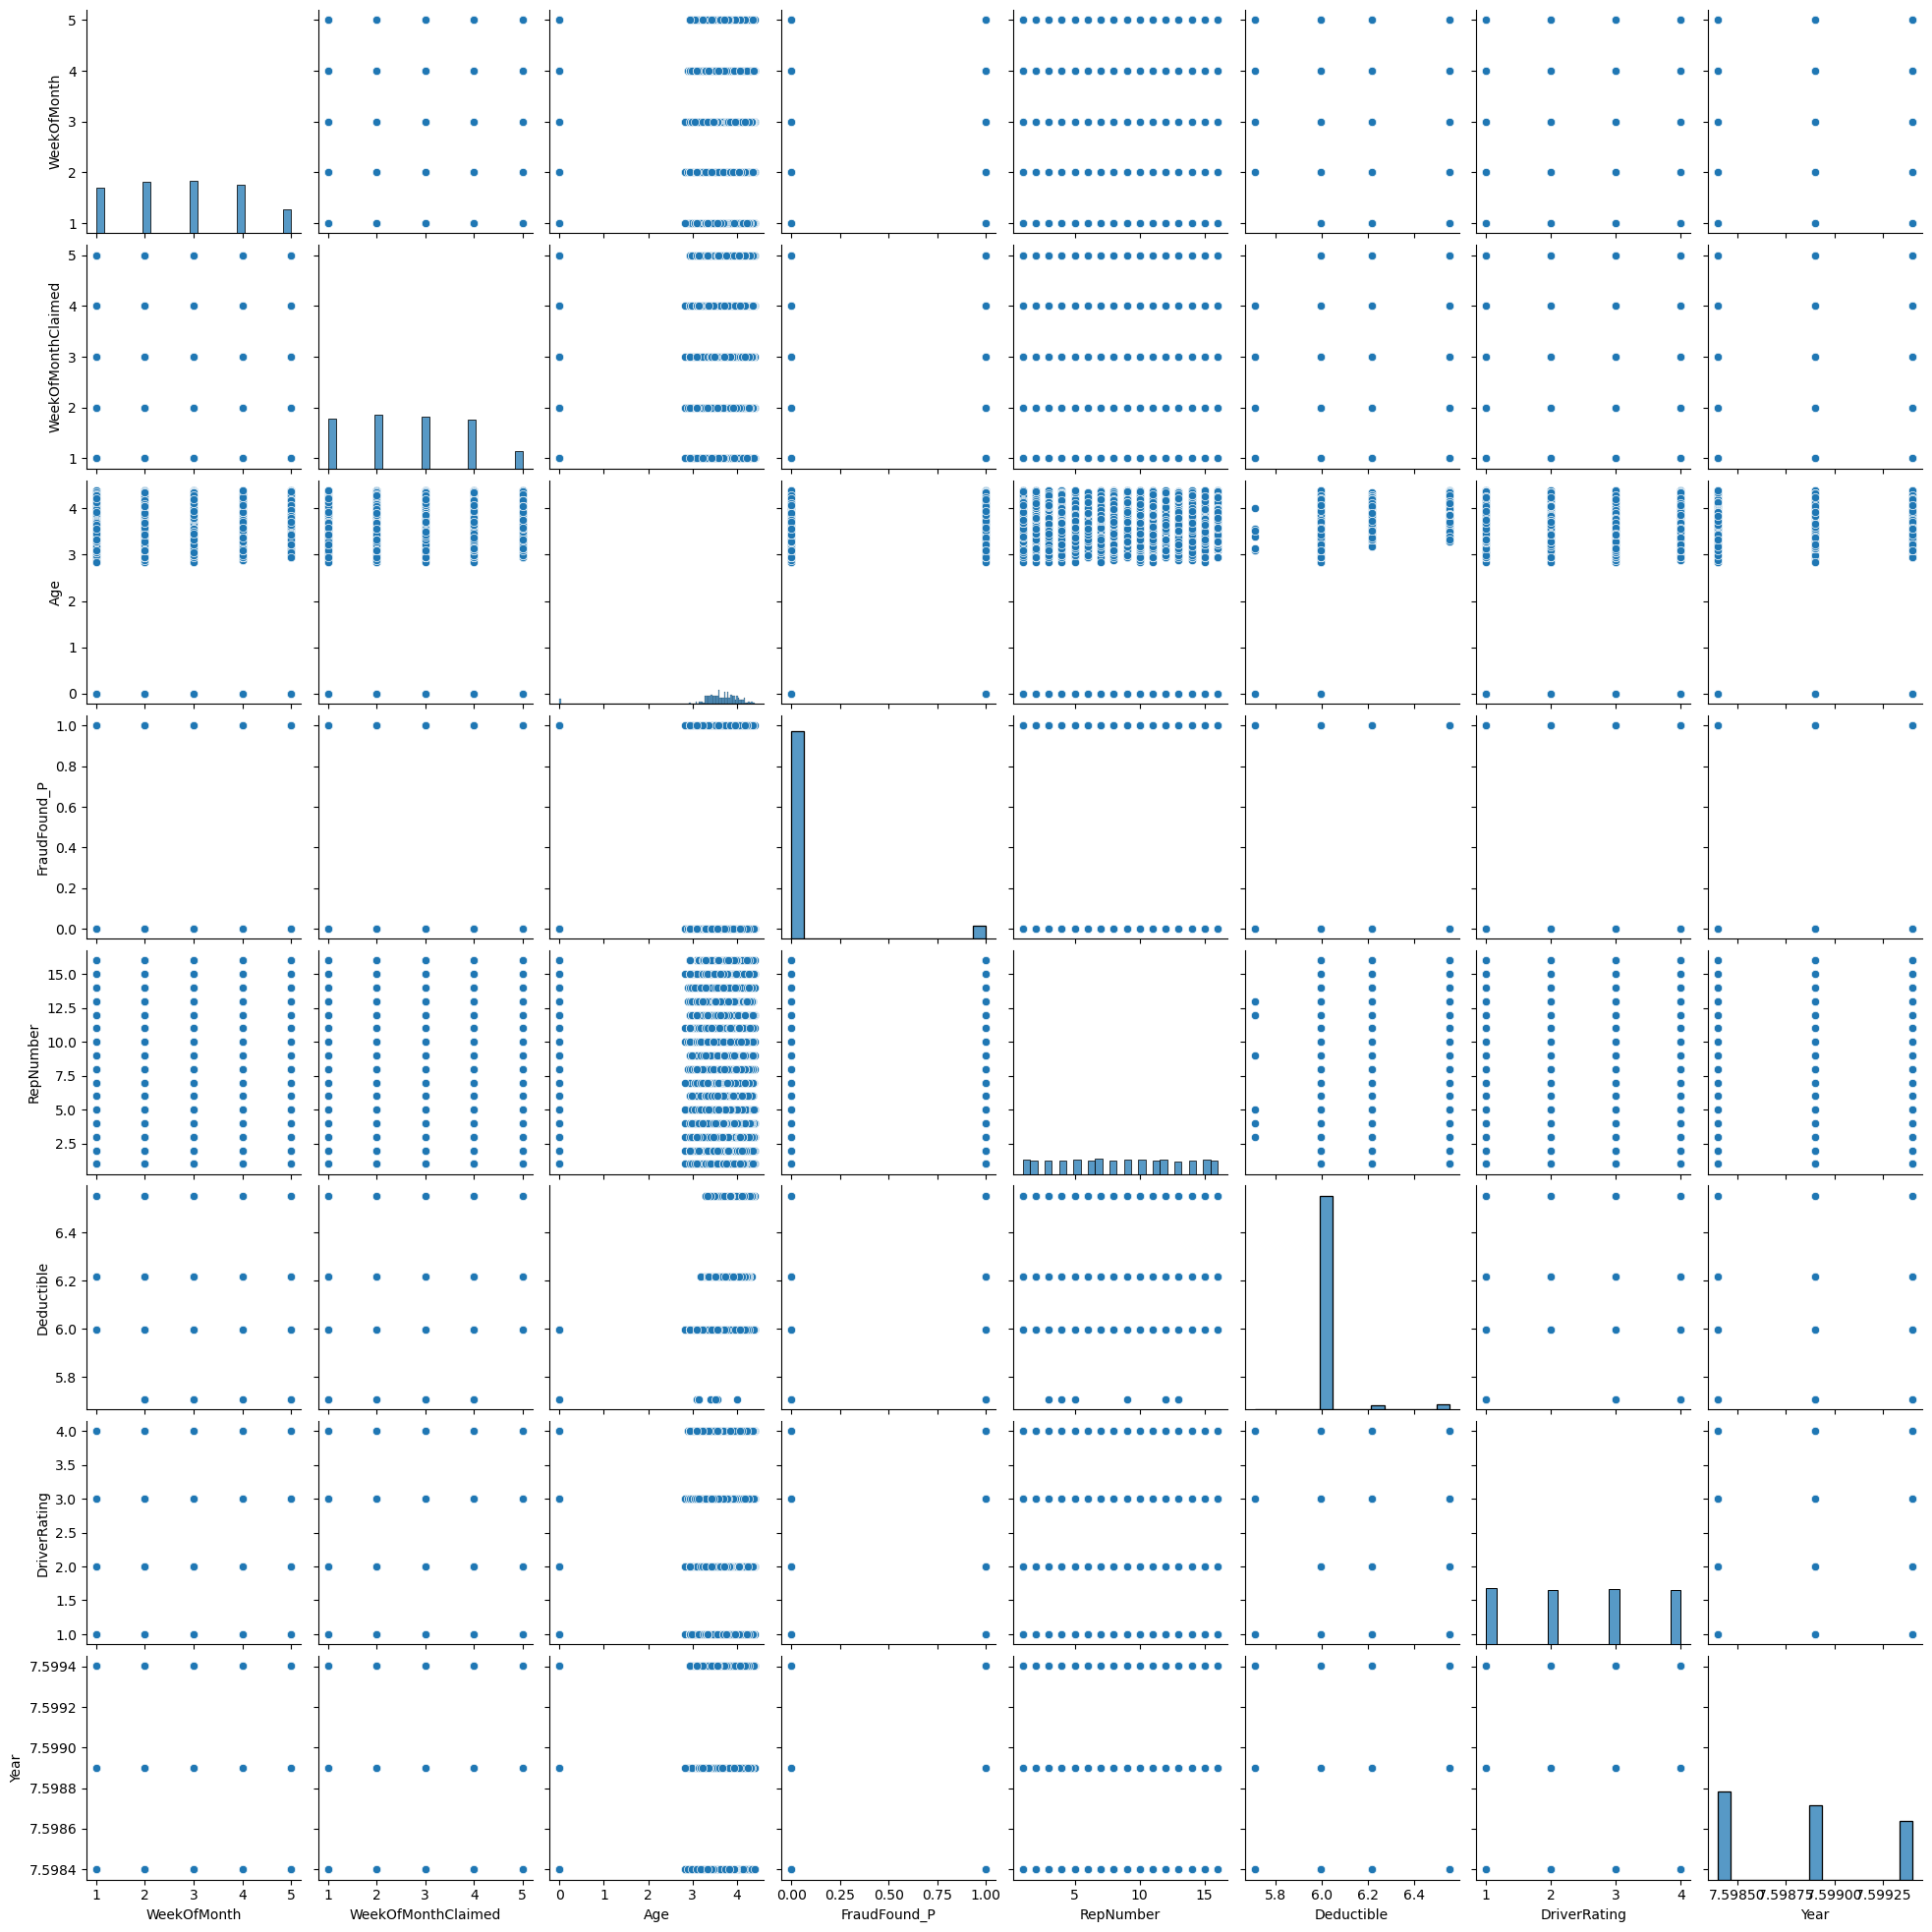

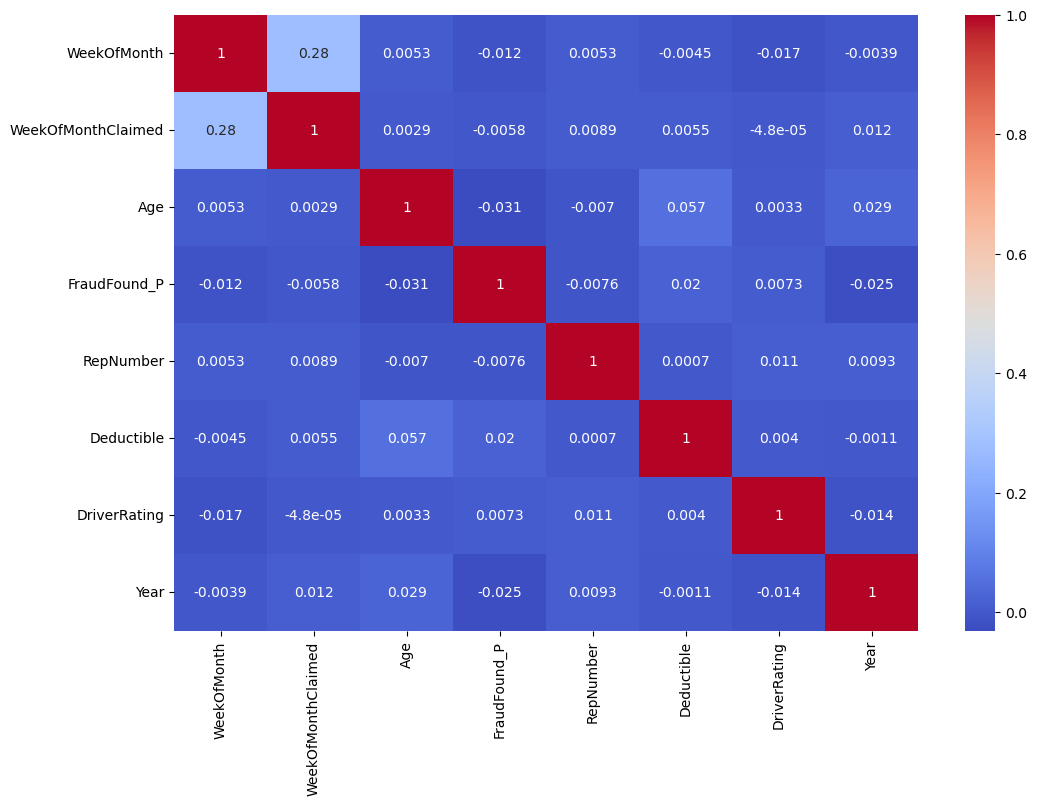

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read the data
df = pd.read_csv('fraud_oracle.csv')
df.drop('PolicyNumber',axis = 1, inplace = True)


# Preprocessing (optional)
columns = ['Age', 'Deductible', 'Year']
df[columns] = df[columns].apply(lambda x: np.log(x+1))


# Understanding the Data
print(df.info())
print('*******************')
print(df.describe())
print('*******************')
print(f'count of nul values = {df.isnull().sum().sum()}')
print('*******************')

# Visualizing the Data
sns.pairplot(df)
plt.show()


# Identifying Relationships
correlation_matrix = df.select_dtypes(['int64','float64']).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np

# Read the data
df = pd.read_csv('fraud_oracle.csv')
df.drop('PolicyNumber',axis = 1, inplace = True)


# # Preprocessing
# columns = ['Age', 'Deductible', 'Year']
# df[columns] = df[columns].apply(lambda x: np.log(10*x+1))

# Split the target
y = df['FraudFound_P']
X = df.drop('FraudFound_P', axis = 1)

# One-hot encode categorical columns
categorical_cols = X.select_dtypes('object').columns
encoder = OneHotEncoder(sparse_output = False)
encoded_cols = pd.DataFrame(encoder.fit_transform(X[categorical_cols]))
encoded_cols.columns = encoder.get_feature_names_out(categorical_cols)

# Combine encoded columns with numeric columns
numeric_X = X.select_dtypes(['int64','float64'])
X_encoded = pd.concat([numeric_X, encoded_cols], axis=1)

# split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3)

# SVM

In [31]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the SVM model
svm_model = SVC(kernel='poly')  # 'rbf', 'poly', etc.

# Train the model
skf = StratifiedKFold(n_splits=5, shuffle=True)

# Perform stratified cross-validation
cv_scores = cross_val_score(svm_model, X_encoded, y, cv=skf, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

# Train the model on the entire dataset
svm_model.fit(X_encoded, y)

# Make predictions
y_pred = svm_model.predict(X_encoded)

# Evaluate the model
print(confusion_matrix(y, y_pred))
print(classification_report(y, y_pred))

Cross-validation scores: [0.94033722 0.94033722 0.94001297 0.94001297 0.94001297]
Mean cross-validation score: 0.9401426718547341
[[14497     0]
 [  923     0]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     14497
           1       0.00      0.00      0.00       923

    accuracy                           0.94     15420
   macro avg       0.47      0.50      0.48     15420
weighted avg       0.88      0.94      0.91     15420



d:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# logistic regression

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


# Initialize the Logistic Regression model
logreg_model = LogisticRegression()

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True)

# Perform stratified cross-validation
cv_scores = cross_val_score(logreg_model, X_encoded, y, cv=skf, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

# Train the model on the entire dataset
logreg_model.fit(X_encoded, y)

# Make predictions
y_pred = logreg_model.predict(X_encoded)

# Evaluate the model
print(confusion_matrix(y, y_pred))
print(classification_report(y, y_pred))

d:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Cross-validation scores: [0.94033722 0.94033722 0.94001297 0.94001297 0.94001297]
Mean cross-validation score: 0.9401426718547341
[[14497     0]
 [  923     0]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     14497
           1       0.00      0.00      0.00       923

    accuracy                           0.94     15420
   macro avg       0.47      0.50      0.48     15420
weighted avg       0.88      0.94      0.91     15420



d:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

# KNN

In [28]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix


# Initialize the KNN model
knn_model = KNeighborsClassifier(n_neighbors=2)

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True)

# Perform stratified cross-validation
cv_scores = cross_val_score(knn_model, X_encoded, y, cv=skf, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

# Train the model on the entire dataset
knn_model.fit(X_encoded, y)

# Make predictions
y_pred = knn_model.predict(X_encoded)

# Evaluate the model
print(confusion_matrix(y, y_pred))
print(classification_report(y, y_pred))

Cross-validation scores: [0.93677043 0.93774319 0.93547341 0.93450065 0.93774319]
Mean cross-validation score: 0.9364461738002594
[[14497     0]
 [  806   117]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     14497
           1       1.00      0.13      0.23       923

    accuracy                           0.95     15420
   macro avg       0.97      0.56      0.60     15420
weighted avg       0.95      0.95      0.93     15420



# Naive Bayes

In [26]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the Naive Bayes model
nb_model = GaussianNB()

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True)

# Perform stratified cross-validation
cv_scores = cross_val_score(nb_model, X_encoded, y, cv=skf, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

# Train the model on the entire dataset
nb_model.fit(X_encoded, y)

# Make predictions
y_pred = nb_model.predict(X_encoded)

# Evaluate the model
print(confusion_matrix(y, y_pred))
print(classification_report(y, y_pred))

Cross-validation scores: [0.4575227  0.39040208 0.53858625 0.41828794 0.50518807]
Mean cross-validation score: 0.46199740596627753
[[6509 7988]
 [  61  862]]
              precision    recall  f1-score   support

           0       0.99      0.45      0.62     14497
           1       0.10      0.93      0.18       923

    accuracy                           0.48     15420
   macro avg       0.54      0.69      0.40     15420
weighted avg       0.94      0.48      0.59     15420



# Decision Tree

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix


# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier()

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True)

# Perform stratified cross-validation
cv_scores = cross_val_score(dt_model, X_encoded, y, cv=skf, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

# Train the model on the entire dataset
dt_model.fit(X_encoded, y)

# Make predictions
y_pred = dt_model.predict(X_encoded)

# Evaluate the model
print(confusion_matrix(y, y_pred))
print(classification_report(y, y_pred))


Cross-validation scores: [0.89688716 0.89623865 0.88975357 0.89818418 0.89364462]
Mean cross-validation score: 0.8949416342412452
[[14497     0]
 [    0   923]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14497
           1       1.00      1.00      1.00       923

    accuracy                           1.00     15420
   macro avg       1.00      1.00      1.00     15420
weighted avg       1.00      1.00      1.00     15420



# Random forest

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100)

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True)

# Perform stratified cross-validation
cv_scores = cross_val_score(rf_model, X_encoded, y, cv=skf, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

# Train the model on the entire dataset
rf_model.fit(X_encoded, y)

# Make predictions
y_pred = rf_model.predict(X_encoded)

# Evaluate the model
print(confusion_matrix(y, y_pred))
print(classification_report(y, y_pred))

Cross-validation scores: [0.94098573 0.94001297 0.93936446 0.94098573 0.94163424]
Mean cross-validation score: 0.9405966277561608
[[14497     0]
 [    1   922]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14497
           1       1.00      1.00      1.00       923

    accuracy                           1.00     15420
   macro avg       1.00      1.00      1.00     15420
weighted avg       1.00      1.00      1.00     15420



# Gradient Boosting

In [24]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True)

# Perform stratified cross-validation
cv_scores = cross_val_score(gb_model, X_encoded, y, cv=skf, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

# Train the model on the entire dataset
gb_model.fit(X_encoded, y)

# Make predictions
y_pred = gb_model.predict(X_encoded)

# Evaluate the model
print(confusion_matrix(y, y_pred))
print(classification_report(y, y_pred))

Cross-validation scores: [0.94228275 0.9419585  0.94130999 0.94130999 0.94293126]
Mean cross-validation score: 0.941958495460441
[[14491     6]
 [  863    60]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     14497
           1       0.91      0.07      0.12       923

    accuracy                           0.94     15420
   macro avg       0.93      0.53      0.55     15420
weighted avg       0.94      0.94      0.92     15420



# XGBoost

In [25]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the XGBoost model
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True)

# Perform stratified cross-validation
cv_scores = cross_val_score(xgb_model, X_encoded, y, cv=skf, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

# Train the model on the entire dataset
xgb_model.fit(X_encoded, y)

# Make predictions
y_pred = xgb_model.predict(X_encoded)

# Evaluate the model
print(confusion_matrix(y, y_pred))
print(classification_report(y, y_pred))


Cross-validation scores: [0.9419585  0.9419585  0.94163424 0.94163424 0.942607  ]
Mean cross-validation score: 0.941958495460441
[[14496     1]
 [  883    40]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     14497
           1       0.98      0.04      0.08       923

    accuracy                           0.94     15420
   macro avg       0.96      0.52      0.53     15420
weighted avg       0.94      0.94      0.92     15420



# Imbalance

In [36]:
y.value_counts()

FraudFound_P
0    14497
1      923
Name: count, dtype: int64

The data set is imbalanced.

# XGBoost
XGBoost can handle it it self if we give it the correct scale_pos_value

Also did some hyperparameter tuning

In [50]:
X_encoded.shape

(15420, 147)

In [54]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix


# Calculate scale_pos_weight
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

# Initialize the XGBoost model with class weight adjustment
xgb_model = XGBClassifier(n_estimators=500, learning_rate=0.1, max_depth=20, scale_pos_weight=scale_pos_weight)

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True)

# Perform stratified cross-validation
cv_scores = cross_val_score(xgb_model, X_encoded, y, cv=skf, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

# Train the model on the entire dataset
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_encoded)

# Evaluate the model
print(confusion_matrix(y, y_pred))
print(classification_report(y, y_pred))


Cross-validation scores: [0.93547341 0.93190661 0.93612192 0.93255512 0.93450065]
Mean cross-validation score: 0.9341115434500649
[[14427    70]
 [  227   696]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     14497
           1       0.91      0.75      0.82       923

    accuracy                           0.98     15420
   macro avg       0.95      0.87      0.91     15420
weighted avg       0.98      0.98      0.98     15420

